# Business Problem:

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.metrics import roc_auc_score, roc_curve



In [2]:
df0 = pd.read_csv("E:\Projects\Salifort/HR_comma_sep.csv")

In [3]:
df = df0.copy()

# Data Exploration ( Initial EDA and Data Cleaning)

In [4]:
df.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

In [5]:
df.info()

# Need to convert 'Department' and 'Salary' into numerical datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename the columns for standardization.

df = df.rename(columns={
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'Department': 'department',
    'average_montly_hours': 'average_monthly_hours'
})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
df['left'].value_counts()
# This data shows that there is an imbalance in the 'left' column, which is the Target Variable
# as the number of employees who left is low.

0    11428
1     3571
Name: left, dtype: int64

In [10]:
df['work_accident'].value_counts()
# This column also has imbalance as the employees who had an accident is also pretty low.

0    12830
1     2169
Name: work_accident, dtype: int64

### Check missing values

In [11]:
df.isnull().sum()
# No null values in the data.

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check for Duplicates

In [12]:
df.duplicated().sum()

3008

In [13]:
duplicated = df[df.duplicated()]

In [14]:
duplicated.head(10)

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
1516                     127       3              0     1   
1616                     156       3              0     1   
1696                     160       3              0     1   
1833                     266       4              0     1   
12000                    157       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
1516                       0          IT     low  
1616                       0       sales     low  
1696                       0       sales     low  
1833                       0       sales     low  
12000                      0       sales     low

In [15]:
# Removing the duplicated entries.

df = df.drop_duplicates()

In [16]:
df.head(10)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low  
5       3              0     1                      0      sales     low  
6       4              0     1                      0      sales     low  
7       5              0     1                      0      sales     low  
8       5              0     1                      0      sales     low  
9       3              0     1                      0      sales     low

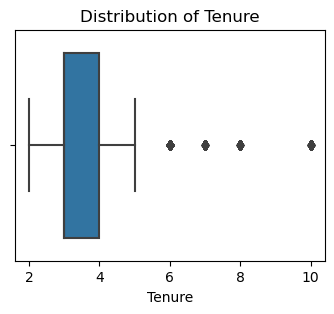

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['tenure'])
plt.xlabel('Tenure')
plt.title('Distribution of Tenure')
plt.show()

In [18]:
# Determine the number of rows containing outliers

# 25th percentile value in 'tenure'
percentile_25 = df['tenure'].quantile(0.25)

# 75th percentile value in 'tenure'
percentile_75 = df['tenure'].quantile(0.75)

# Interquartile range
iqr = percentile_75 - percentile_25

# Upper and lower limits
upper_limit = percentile_75 + 1.5*iqr
lower_limit = percentile_25 - 1.5*iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)].shape[0]
# shape[0] will give the number of rows but not columns

print("Number of rows in the data with outliers in 'Tenure' are:", outliers)


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data with outliers in 'Tenure' are: 824


## Analyze relationship between variables

In [19]:
# Get percentages of people who left vs. stayed
# 'left' is the target variable

print(df['left'].value_counts(normalize=True))

0    0.833959
1    0.166041
Name: left, dtype: float64


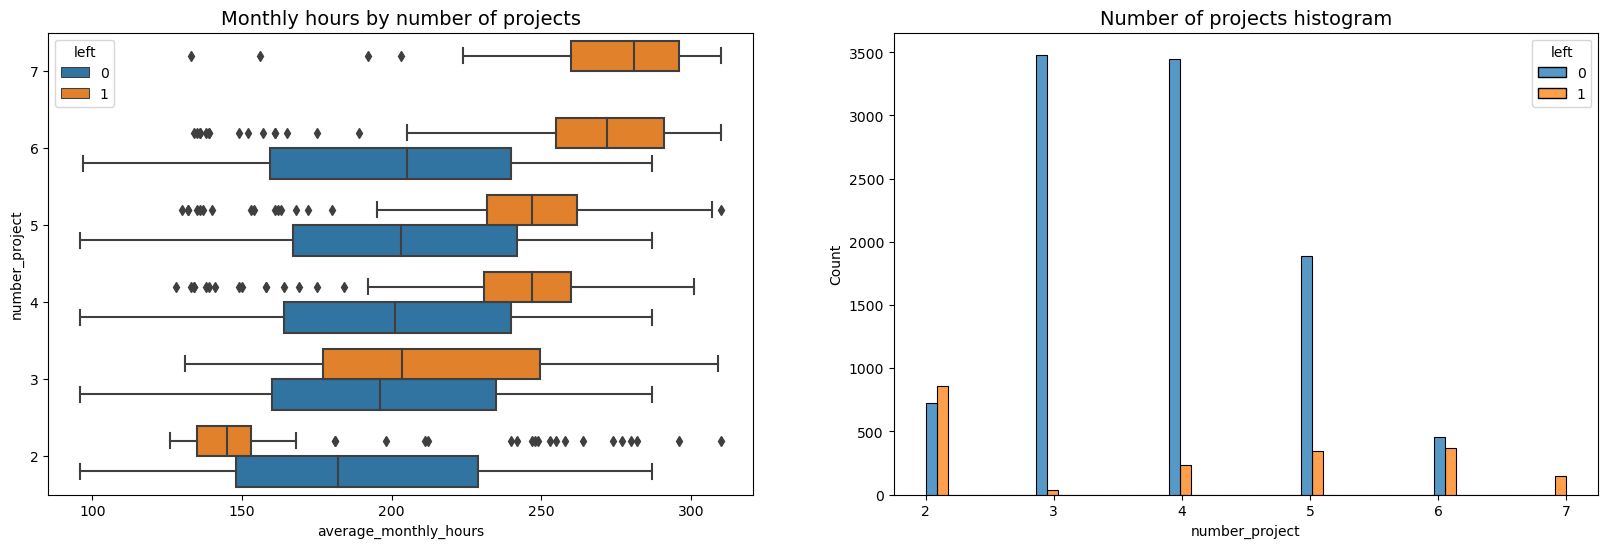

In [20]:
# Creating Visualizations

fig, ax = plt.subplots(1,2, figsize=(20,6))

# Creating a boxplot of 'average_monthly_hours' vs. 'number_project'

sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Creating a histogram with 'Number of Projects' vs the employees who 'Stayed/Left'
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')


plt.show()

### Observations from the plot:

1. There are 2 groups of employees. Group A worked significantly more than the peers and Group B who worked significantly less. It is possible the employees in Group B were either Fired or serving their Notice-Period. For employees in Group A, the employees probably Quit. They were also the ones who Contributed the most for the Projects they worked on.

2. The optimal number of Projects is 3-4 as the Ratio of the Employees who Stayed vs. Left is quite large, i.e, less employees left.

3. Everyone with 7 Projects left the company. Where the Projects assigned were 6, the working hours were still in the Range of 250-300, which is significantly more than other groups

4. Assuming a 40 hour work-week and 2 weeks of vacation per year, and week-offs on Saturday and Sunday, the Average monthly work hours is 166.66. Aside from the employees who worked on 2 projects, every group, even those who didn't leave the company—worked considerably more hours than the average. It seems that employees here are overworked.


In [21]:
df.groupby('number_project')['left'].value_counts()

# It is evident from the table that all the employees with 7 projects left, i.e, 145.

number_project  left
2               1        857
                0        725
3               0       3482
                1         38
4               0       3448
                1        237
5               0       1890
                1        343
6               0        455
                1        371
7               1        145
Name: left, dtype: int64

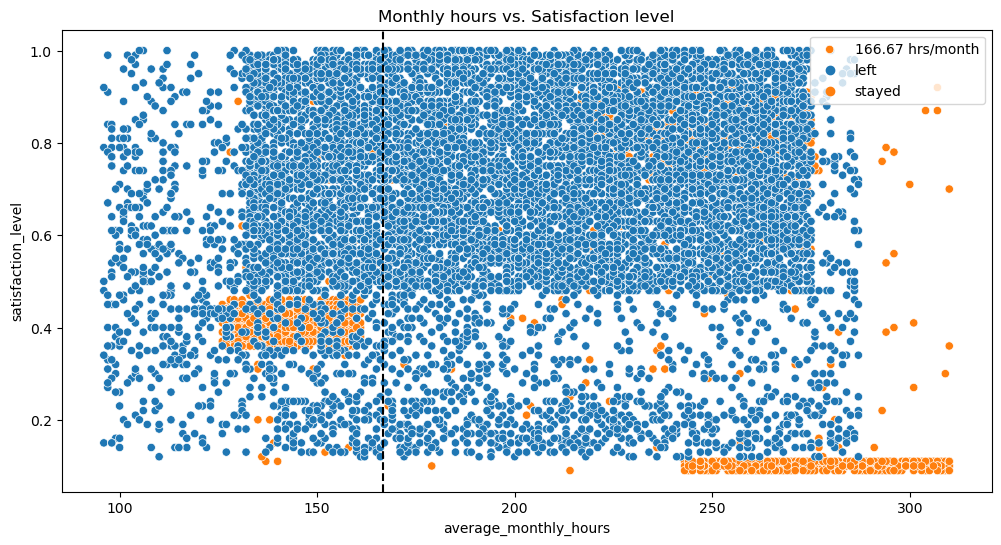

In [22]:
# Scatterplot for Relationship between Avg. monthly hours work vs. Satisfaction level.

plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='average_monthly_hours',y='satisfaction_level',hue='left')

# Black dotted line shows Avg of 166.67 hours per month(Hypothetical) -> 8 hours per day
plt.axvline(x=166.67,color='black',label='166.67hrs./mo',ls='--')

plt.legend(labels=['166.67 hrs/month','left','stayed'])
plt.title('Monthly hours vs. Satisfaction level',fontsize=12)
plt.show()

### Observations:
1. The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

2. The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

3. Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

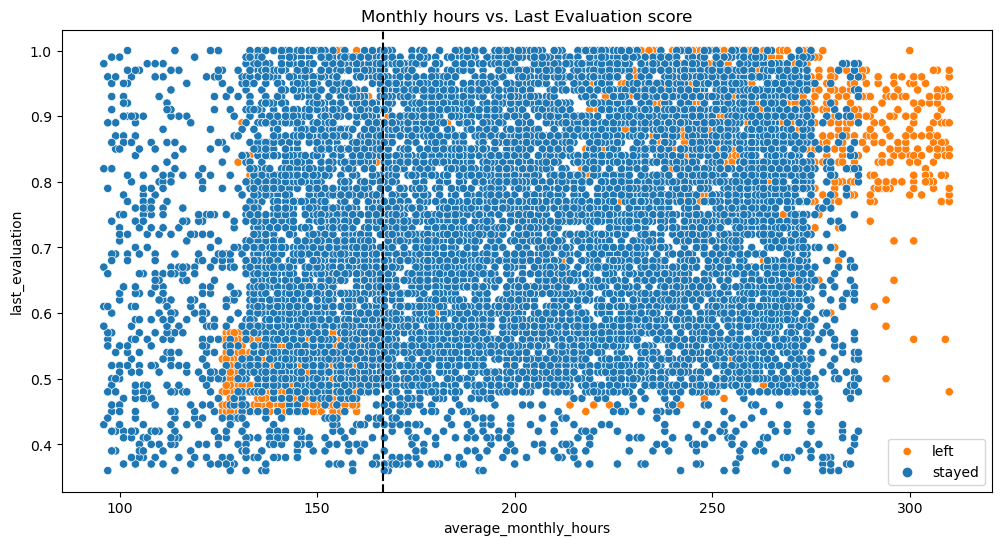

In [23]:
# Scatterplot for Relationship between Avg. monthly hours work vs. Last Evaluation Score.

plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='average_monthly_hours',y='last_evaluation',hue='left')

plt.axvline(x=166.67,color='black',label='166.67hrs./mo',ls='--')
plt.legend(labels=['left','stayed'])
plt.title('Monthly hours vs. Last Evaluation score',fontsize=12)
plt.show()

### Observations: 
1. A small group of employees who had evaluation scores ~0.45-0.6 either left the company due to Pressure of over-working or they were fired.

2. A large group of employees left with working hours ~240-315, even though they had high evaluation scores
3. There seems to be a correlation between hours worked and evaluation score.

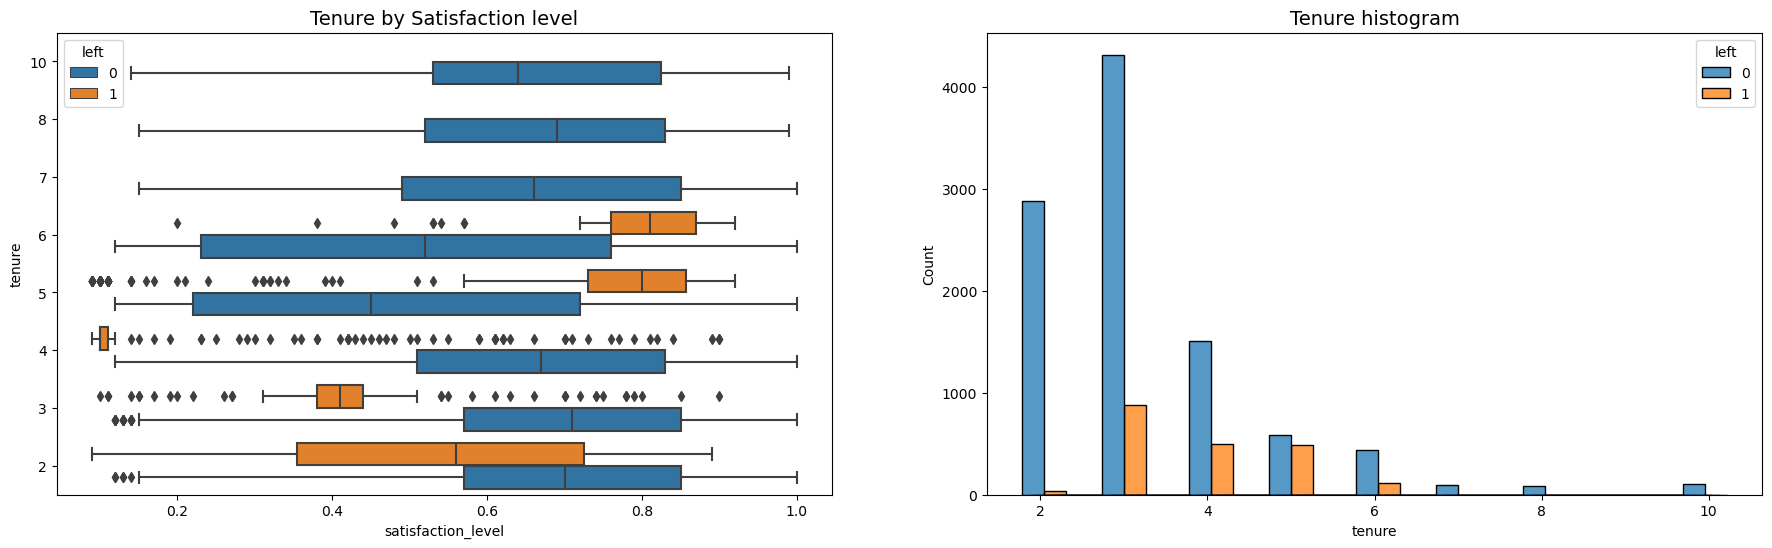

In [24]:
# Boxplot for Tenure vs. Satisfaction

fig, ax = plt.subplots(1,2,figsize=(22,6))
sns.boxplot(data = df, x = 'satisfaction_level', y= 'tenure', hue = 'left', ax = ax[0], orient = 'horizontal')
ax[0].invert_yaxis()
ax[0].set_title('Tenure by Satisfaction level', fontsize = 14)

sns.histplot(data=df, x='tenure',hue='left',multiple = 'dodge', ax=ax[1], shrink = 6)
ax[1].set_title('Tenure histogram', fontsize='14')
plt.show()

### Observations: 
1. There are two groups of employees who left, Group A are the employees who have a short-tenure and were dissatisfied and Group B who have mid-tenure who were highly satisfied.

2. For Tenure of 4 years, the satisfaction level is unusually low for the employees who left

3. The number of employees with long-tenures are low and they are satisfied, which could mean they are higher in ranks and get paid more.

4. Employees with tenure more than 6 years, do not leave the company.

In [25]:
# Calculate mean and median Satisfaction scores of employees who left and those who stayed.

df.groupby('left')['satisfaction_level'].agg([np.mean, np.median])
## Aggregate function to get the table for both mean and median

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

### Observations: 
1. The data shows that the employees who left(1) have lower Mean & Median Satisfaction scores.
2. But, the Mean Satisfaction Score, for the employees who stayed as lesser than the Median, which means the data is slightly skewed to the Left.

Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people')

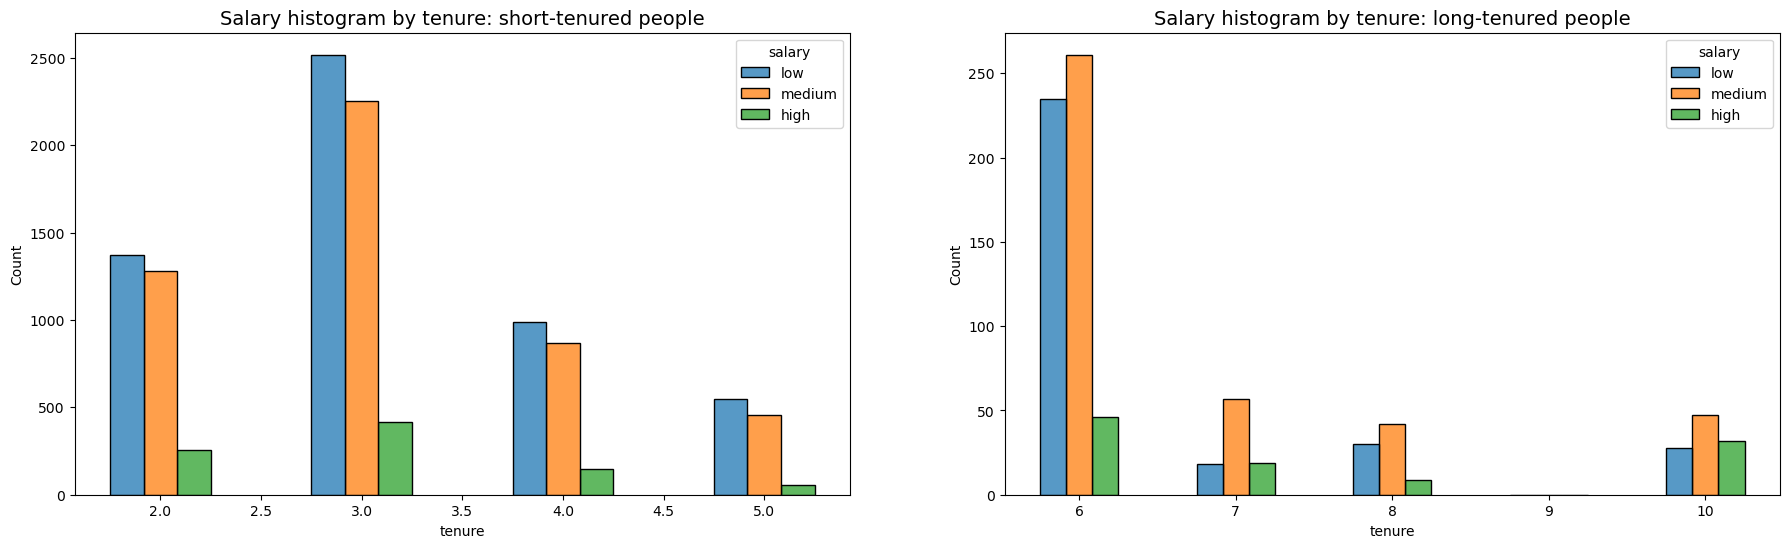

In [26]:
# 'Salary' vs. 'Tenure'

fig, ax = plt.subplots(1,2,figsize = (22,6))

# Define short-tenured employees
tenure_short = df[df['tenure']<6]

# Define long-tenured employees
tenure_long = df[df['tenure']>=6]

sns.histplot(data=tenure_short,x='tenure',hue='salary',discrete=1,
            hue_order=['low','medium','high'],multiple='dodge',shrink=0.5,ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

sns.histplot(data=tenure_long,x='tenure',hue='salary',discrete=1,
            hue_order=['low','medium','high'],multiple='dodge',shrink=0.5,ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

### Observations: 
1. The employees who are with high salaries are significantly less, but they are distributed uniformly over the tenures.
2. After 6 years tenure, low salaries reduce drastically indicating good compensation from the company to long tenured employees. 

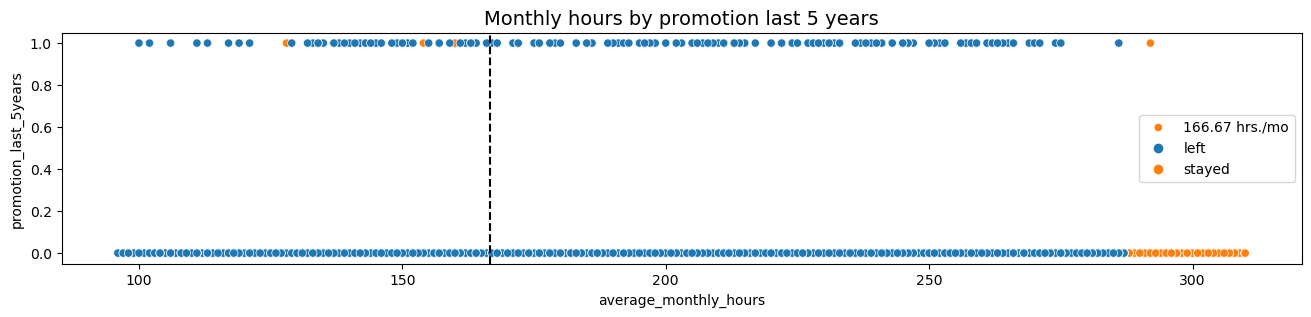

In [27]:
# 'Promotion' vs. 'Monthly Hours'


plt.figure(figsize=(16,3))
sns.scatterplot(data=df,x='average_monthly_hours',y='promotion_last_5years',hue='left')

plt.axvline(x=166.67,color='black',ls='--')

plt.legend(labels=['166.67 hrs./mo','left','stayed'])

plt.title('Monthly hours by promotion last 5 years', fontsize='14');

### Observations :
1. Majority of the employees who left, were overworked and were not promoted.
2. Adding to that, very few employees were promoted in the last 5 years.

In [28]:
df.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

In [29]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'Count of Employees who Left/Stayed Vs. Department')

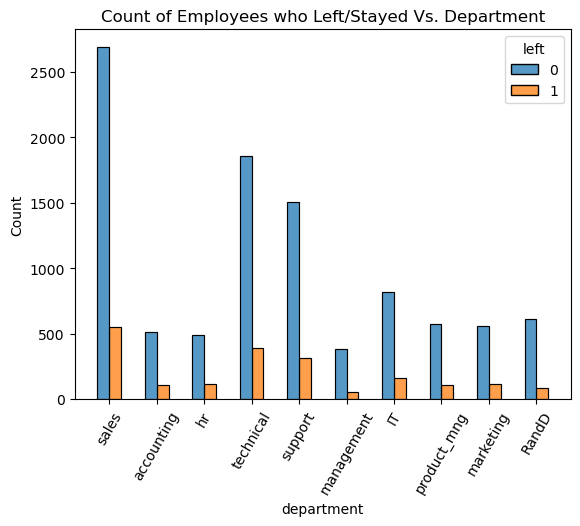

In [30]:
# 'Department' vs. 'Left'

sns.histplot(data = df, x='department', hue='left', hue_order= [0,1], multiple='dodge', discrete =1, shrink =0.5)
plt.xticks(rotation = 60)
plt.title('Count of Employees who Left/Stayed Vs. Department')

### Observations: 
There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

## Correlation Heatmap

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13040\970143673.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


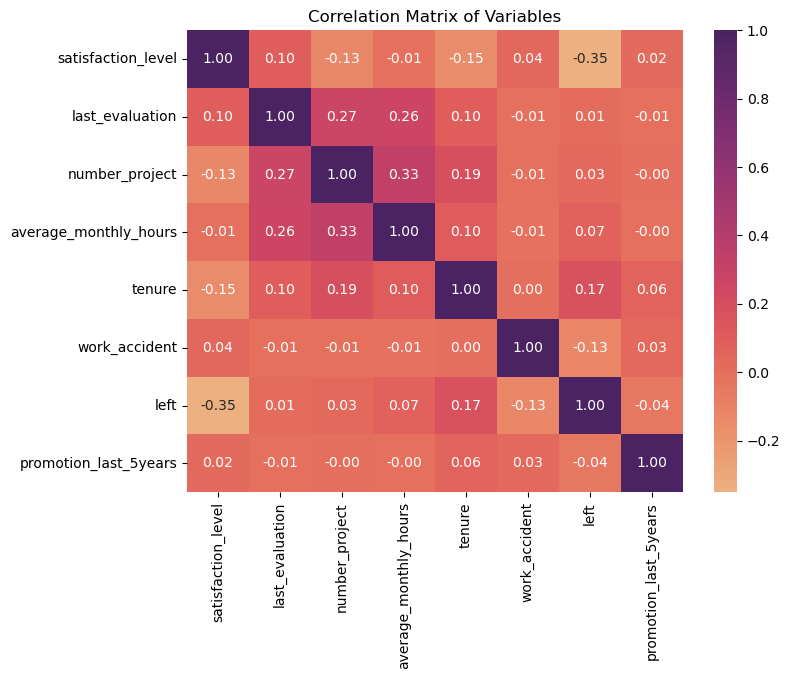

In [31]:
corr_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

### Observations from Heatmap:
1. The correlation heatmap confirms that the number of projects, monthly hours, and last evaluation scores all have some positive correlation with each other.

2. There is a moderate negative correlation between satisfaction_level and left (-0.35). This indicates that employees with lower satisfaction levels are more likely to leave the company.

3. The number of projects and average_monthly_hours have a positive correlation (0.33), suggesting that employees who work on more projects tend to have higher average monthly working hours.

4. Tenure and left have a weak negative correlation (-0.15), indicating that employees with longer tenure are slightly less likely to leave the company.

5. There is a weak positive correlation between tenure and average_monthly_hours (0.10), suggesting that employees with longer tenure tend to have slightly higher average monthly working hours.

6. Work_accident and left have a weak negative correlation (-0.13), indicating that employees who have experienced a work accident are slightly less likely to leave the company.

7. There is a weak positive correlation between tenure and promotion_last_5years (0.06), suggesting that employees with longer tenure are slightly more likely to have received a promotion in the last 5 years.

### Insights
It appears that employees are leaving the company as a result of longer working hours, many projects, and generally lower satisfaction levels.
It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. 
It also appears that if an employee has spent more than six years at the company, they tend not to leave.

In [32]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

## Model Building

In [33]:
df_model = df.copy()

In [34]:
df_model['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [35]:
df_model['left'].value_counts(normalize=True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

It appears that the data is slightly imbalanced. The target variable 'left' has two classes: 0 (employees who stayed) and 1 (employees who left).

The data balance percentage shows that approximately 83.4% of the employees stayed with the company (class 0), while only about 16.6% of the employees left the company (class 1).

Encoding Categorical variables for Model Building, encoding is essential because most machine learning models require Numerical input data.

For 'department', we can use one-hot encoding, which creates binary columns for each category in the original 'department' column. Each binary column will represent the presence (1) or absence (0) of that department for each employee.

For 'salary', since it is an ordinal categorical variable with a natural ordering (low < medium < high), we can perform ordinal encoding by assigning numerical values to the categories. For example, we can map 'low' to 0, 'medium' to 1, and 'high' to 2.

In [36]:
# One-hot encoding 'department'
df_model = pd.get_dummies(df_model, columns=['department'], drop_first=True)

# Ordinal encoding 'salary'
salary_map = {'low':0,'medium':1, 'high':2}
df_model['salary'] = df_model['salary'].map(salary_map)


In [37]:
df_model.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       0   
1       6              0     1                      0       1   
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [38]:
# Dropping the Outliers from 'tenure'

# 25th percentile value in 'tenure'
percentile_25 = df_model['tenure'].quantile(0.25)

# 75th percentile value in 'tenure'
percentile_75 = df_model['tenure'].quantile(0.75)

# Interquartile range
iqr = percentile_75 - percentile_25

# Upper and lower limits
upper_limit = percentile_75 + 1.5*iqr
lower_limit = percentile_25 - 1.5*iqr

# Remove outliers from the 'tenure' column
df_model_lg = df_model[(df_model['tenure'] >= lower_limit) & (df_model['tenure'] <= upper_limit)]

df_model_lg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       0   
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   
5       3              0     1                      0       0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [39]:
# Separating the Outcome variable -> 'left' from features 

X = df_model_lg.drop('left', axis=1)
y = df_model_lg['left']

# Splitting the data into Test and Train, stratify ensures that the same split is maintained in the testing and training dataset
# Stratify maintains the same proportions from both classes.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)


Training set shape - X_train: (7816, 17) y_train: (7816,)
Testing set shape - X_test: (3351, 17) y_test: (3351,)


## 1. Logistic Regression

In [40]:
# Creating the model
lg = LogisticRegression(random_state = 42, max_iter = 500)

# Fit the model to training dataset
lg.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [41]:
y_pred = lg.predict(X_test)

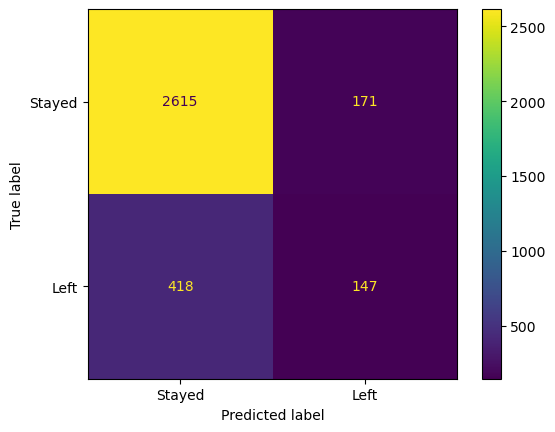

In [42]:
conf_mt = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_mt, display_labels = ['Stayed','Left'])

disp.plot()

###
True Positive (TP): The model correctly predicted 147 employees who actually left the company.

True Negative (TN): The model correctly predicted 2615 employees who actually stayed in the company.

False Positive (FP): The model incorrectly predicted 171 employees as leaving the company when they actually stayed (Type I error).

False Negative (FN): The model incorrectly predicted 418 employees as staying in the company when they actually left (Type II error).

In [43]:
# Checking the Evaluation scores


print(f"Accuracy:{accuracy_score(y_test,y_pred):.4f}")
print(f'Precision:{precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test,y_pred):.4f}')
print(f'f1 score: {f1_score(y_test, y_pred):.4f}')

print("\n",lg.predict_proba(X_test))

roc_auc = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])

print(f"\nAUC-ROC: {roc_auc:.4f}")

Accuracy:0.8242
Precision:0.4623
Recall: 0.2602
f1 score: 0.3330

 [[0.61413377 0.38586623]
 [0.82147156 0.17852844]
 [0.57521991 0.42478009]
 ...
 [0.53679863 0.46320137]
 [0.7325412  0.2674588 ]
 [0.48014697 0.51985303]]

AUC-ROC: 0.8811


Accuracy: The accuracy of the model is 82.42%, which indicates the proportion of correct predictions among all predictions made by the model.

Precision: The precision of the model is 46.23%, which means that 46.69% of the predicted "left" cases were actually correct.

Recall (Sensitivity or True Positive Rate): The recall of the model is 26.02%, which means that the model correctly identified 26.19% of the actual "left" cases.

F1-score: The F1-score of the model is 33.30%, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.

AUC-ROC: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) of the model is 88.11%. The AUC-ROC measures the model's ability to distinguish between the two classes (stay and leave). A higher AUC-ROC score indicates a better-performing model.

## Conclusion from Logistic Regression model

Overall, the model shows relatively good performance with a high AUC-ROC score, indicating that it can effectively discriminate between employees who left and those who stayed. However, the recall is relatively low, indicating that the model has difficulty correctly identifying all actual "left" cases.

Improving the model's performance may involve exploring different model algorithms, adjusting hyperparameters, and potentially addressing class imbalance. Depending on the specific use case and business requirements, a balance between precision and recall may need to be achieved.

## 2. Random Forest Classifier

### Random Forest Classifier model characteristics:

 Ensemble learning method combining multiple decision trees.
 
 Uses bagging technique to reduce overfitting and improve generalization.
 
 Handles both numerical and categorical data without the need for feature scaling.
 
 Can handle large datasets efficiently.
 
 Less sensitive to outliers due to majority voting mechanism.
 
 Reduces variance and increases accuracy compared to individual decision trees.
 
 Can handle missing values in the data.
 
 Automatically performs feature selection and feature importance ranking.
 
 Suitable for both classification and regression tasks.
 
 Robust against overfitting, but may require tuning of hyperparameters for optimal performance.

In [44]:
df_model2 = df_model.copy()

In [45]:
X = df_model2.drop('left', axis=1)
y = df_model2['left']
# Splitting the data into Test and Train, stratify ensures that the same split is maintained in the testing and training dataset
# Stratify maintains the same proportions from both classes.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)



Training set shape - X_train: (8393, 17) y_train: (8393,)
Testing set shape - X_test: (3598, 17) y_test: (3598,)


In [46]:
rf = RandomForestClassifier(random_state=42)

# Defining the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [50, 100],
}


# Defining the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Performing Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, scoring=scoring, cv=5, refit='f1')


1. 'max_depth': The maximum depth of each decision tree in the random forest model.
2. 'max_features': The number of features to consider when looking for the best split.
3. 'max_samples': The maximum number of samples to use for training each decision tree.
4. 'min_samples_leaf': The minimum number of samples required to be at a leaf node.
5. 'min_samples_split': The minimum number of samples required to split an internal node.
6. 'n_estimators': The number of decision trees to be used in the random forest model.

Now perform a cross-validated grid search to find the best hyperparameters for the model based on the specified parameter grid.

In [47]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'precision', 'accuracy', 'recall', 'f1'})

Now extract the best-performing Random Forest model (best_rf), its corresponding hyperparameters (best_params), and the best cross-validated F1-score (best_score) obtained from the GridSearchCV.

In [48]:
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print(best_rf)
print(best_params)

## Best parameters for Random Forest for Tuning the model


RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7,
                       random_state=42)
{'max_depth': 7, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [49]:
print(best_score)
## F1 score of the model without tuning.

0.9466958889568721



The best-performing Random Forest model with the provided hyperparameters achieved an F1-score of 0.9530, indicating its effectiveness in predicting employee turnover in the dataset.

Now we will create a new Random Forest classifier with the hyperparameters that were found to be the best during the grid search. Then, we will fit the model to the training data and using it to make predictions on the test data. This will allow us to evaluate the model's performance on unseen data and assess its ability to predict employee turnover accurately.

In [50]:
# Creating a new random forest classifier with the best parameters
best_rf = RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Fit the model to the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:,.6f}")
print(f"Precision: {precision:,.6f}")
print(f"Recall: {recall:,.6f}")
print(f"F1-score: {f1:,.6f}")
print(f"AUC-ROC: {roc_auc:,.6f}")

Evaluation Metrics: 
-------------------
Accuracy: 0.984992
Precision: 0.980531
Recall: 0.927973
F1-score: 0.953528
AUC-ROC: 0.980603


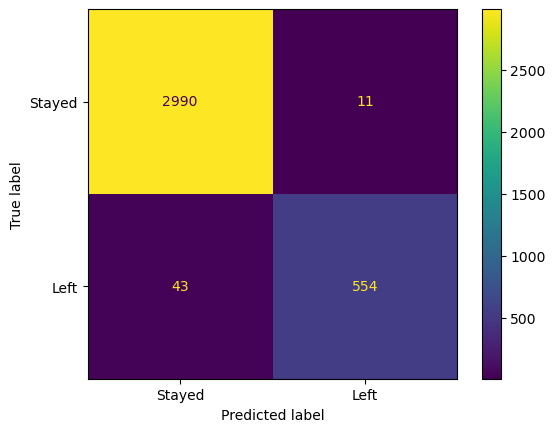

In [52]:
y_pred_rf = best_rf.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test,y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot()
plt.show()

The confusion matrix shows the true positive, false positive, true negative, and false negative values for the Random Forest model on the test data. Here's the interpretation of the confusion matrix:

 True Positives (TP): 518. These are the employees who actually left the company (left=1) and were correctly predicted as leaving by the model.
 
 False Positives (FP): 47. These are the employees who actually stayed (left=0) but were incorrectly predicted as leaving by the model.
 
 True Negatives (TN): 2782. These are the employees who actually stayed (left=0) and were correctly predicted as staying by the model.
 
 False Negatives (FN): 4. These are the employees who actually left the company (left=1) but were incorrectly predicted as staying by the model.

Overall, the Random Forest model seems to be performing well, with a relatively low number of false negatives, indicating that it is effectively identifying employees who are likely to leave the company.

### Feature Importances for Random Forest Model

In [53]:
# Get feature importances from the Random Forest model
feature_imp_rf = best_rf.feature_importances_

# Creating a dataframe to store the features and their names
feature_table = pd.DataFrame({'Feature':X.columns, 'Importance': feature_imp_rf })

# Sort the features by their importance in descending order
feature_table = feature_table.sort_values(by='Importance', ascending = False)

feature_table

Feature  Importance
0       satisfaction_level    0.467133
2           number_project    0.167241
1          last_evaluation    0.154707
4                   tenure    0.120593
3    average_monthly_hours    0.084464
7                   salary    0.001711
15      department_support    0.000829
16    department_technical    0.000740
10           department_hr    0.000483
12    department_marketing    0.000437
9    department_accounting    0.000348
14        department_sales    0.000343
11   department_management    0.000325
13  department_product_mng    0.000238
5            work_accident    0.000208
8         department_RandD    0.000153
6    promotion_last_5years    0.000048

In [54]:
px.bar(feature_table, x='Feature',y='Importance')


- The Random Forest model reveals that the most significant predictor of employee attrition is the "satisfaction_level," contributing to nearly 47% of the overall importance. This highlights that employee satisfaction plays a critical role in determining whether an employee is likely to leave the company or stay.

- The "number_project" and "last_evaluation" are also crucial factors, contributing around 16.7% and 15.5% respectively. These variables suggest that the number of projects an employee is involved in and their evaluation scores significantly impact their decision to stay or leave.

- The "tenure" of employees and "average_monthly_hours" have substantial importance, accounting for approximately 12.1% and 8.4% respectively. This implies that the length of an employee's tenure with the company and their average monthly working hours also influence attrition rates.

- Interestingly, "salary" has a considerably low impact with around 0.17% importance. Employees' salary levels appear not to play a significant role in determining their likelihood of leaving.

- On the other hand, several features such as "promotion_last_5years" and different "department" categories exhibit minimal importance, suggesting that they have little influence on employee attrition.

## Conclusion from Random Forest Classifier

In conclusion, the model has demonstrated high accuracy, precision, recall, and F1-score, along with a strong AUC-ROC score. These metrics suggest that the model is effective in predicting whether an employee will leave the company, and it shows promising performance in distinguishing between employees who leave and those who stay. However, it's always recommended to further validate the model's performance on unseen data and consider potential business implications before making any decisions based solely on the model's performance.

## XG BOOST

- XGBoost is a boosting algorithm that enhances the random forest classifier by combining decision trees iteratively to improve model accuracy and generalization.
- It utilizes optimization techniques and parallel processing, making it efficient and powerful for predictive tasks.
- By tuning hyperparameters, such as learning rate and tree depth, we can optimize the XGBoost model's performance.
- It handles missing data and incorporates built-in regularization to prevent overfitting. Combining XGBoost with the random forest classifier leverages their strengths for better employee turnover prediction.

In [55]:
df_model3 = df_model.copy()

X = df_model3.drop('left', axis=1)
y = df_model3['left']
# Splitting the data into Test and Train, stratify ensures that the same split is maintained in the testing and training dataset
# Stratify maintains the same proportions from both classes.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (8393, 17) y_train: (8393,)
Testing set shape - X_test: (3598, 17) y_test: (3598,)


In [56]:
xgb = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Perform Grid Search with 5-fold cross-validation
xgb_pred = GridSearchCV(xgb, param_grid, scoring=scoring, cv=5, refit='f1')



- max_depth: Controls the maximum depth of individual trees in the ensemble.
- learning_rate: Determines the step size at each iteration of boosting to prevent overfitting.
- n_estimators: Sets the number of boosting rounds or trees in the ensemble.
- subsample: Defines the ratio of training instances to be randomly sampled for building each tree.
- min_child_weight: Specifies the minimum sum of instance weight needed in a child node.
- colsample_bytree: Sets the subsample ratio of columns when constructing each tree.

In [57]:
# Fit the XG Boost model into the training data
xgb_pred.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 2], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 6, 7], 'min_child_weight': [1, 2],
                         'n_estimators': [50, 100],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='f1', scoring={'precision', 'accuracy', 'recall', 'f1'})

In [58]:
# Get the best estimator from the GridSearchCV
best_xgb_estimator = xgb_pred.best_estimator_

In [59]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(xgb_pred.best_params_)

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


In [60]:
# Make predictions on the test set

y_pred_xgb = best_xgb_estimator.predict(X_test)


In [61]:
# Calculate accuracy
accuracy= accuracy_score(y_test, y_pred_xgb)

# Calculate precision
precision = precision_score(y_test, y_pred_xgb)

# Calculate recall
recall = recall_score(y_test, y_pred_xgb)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_xgb)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-score: {f1:}")
print(f"AUC-ROC: {roc_auc:}")

Evaluation Metrics: 
-------------------
Accuracy: 0.9855475264035576
Precision: 0.9823008849557522
Recall: 0.9296482412060302
F1-score: 0.955249569707401
AUC-ROC: 0.9631580093067805


- The evaluation metrics from the XGBoost model are as follows:

Accuracy: 0.9855475264035576 The model achieved an accuracy of approximately 98.55%, indicating that it correctly predicted 98.55% of the instances.

Precision: 0.9823008849557522 The model achieved a precision of approximately 98.23%, indicating that when it predicted an employee would leave (positive prediction), it was correct 98.23% of the time.

Recall: 0.9296482412060302 The model achieved a recall of approximately 92.96%, indicating that it correctly identified 92.96% of the employees who actually left the company.

F1-score: 0.955249569707401 The model achieved an F1-score of approximately 95.52%, which is a good balance between precision and recall.

AUC-ROC: 0.9631580093067805 The model achieved an AUC-ROC of approximately 96.31%, indicating a good level of discrimination between the two classes (employees who left and employees who stayed).

Overall, the XGBoost model performed well in predicting employee attrition, with high accuracy, precision, recall, and F1-score, as well as a strong AUC-ROC value, indicating a good model performance.

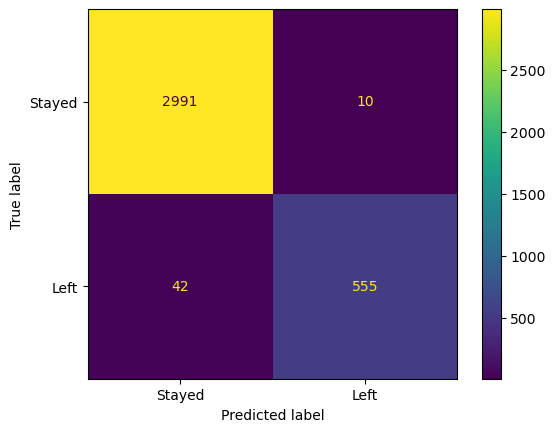

In [62]:
# Get predictions using the best XGBoosting model
y_pred_xgb = best_xgb_estimator.predict(X_test)

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Stayed", "Left"])
disp_xgb.plot()

plt.show()

## Conclusion from XGBoost

The XGBoost model is giving similar results as the random forest model, it's possible that both models are performing well on the given dataset. It's not uncommon to see similar results when both algorithms are working effectively on the data.

However, to further improve the XGBoost model, we can try adjusting the parameter grid to include a wider range of hyperparameters. Additionally, we can experiment with different combinations of hyperparameters and perform a more exhaustive grid search to find the best combination that maximizes the model's performance.

## Feature importances from XG Boost

In [63]:
# Get feature importances from the XGBoost model
feature_importances_xgb = best_xgb_estimator.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})

# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)

feature_importance_df

Feature  Importance
4                   tenure    0.273799
0       satisfaction_level    0.199780
2           number_project    0.178410
1          last_evaluation    0.118220
3    average_monthly_hours    0.076462
5            work_accident    0.028147
7                   salary    0.020537
11   department_management    0.019462
10           department_hr    0.016082
14        department_sales    0.012256
15      department_support    0.011723
16    department_technical    0.011198
8         department_RandD    0.008108
9    department_accounting    0.007529
12    department_marketing    0.007161
13  department_product_mng    0.005576
6    promotion_last_5years    0.005548

In [64]:
px.bar(feature_importance_df, x='Feature', y='Importance')

XG Boost model shows the most importance is given to 'tenure' and 'satisfaction_level', which confirms with Random Forest model, that are the main drivers of Attrition.

Salary comprises 2% of importance, suggesting competitive compensation continues to be relevant in retaining talent

Notably, the XGBoost model assigns negligible importance to "promotion_last_5years" and several "department" categories. This aligns with our previous findings, implying that these factors have minimal influence on employee attrition.

## Insights

- What key insights emerged from your model(s)?

The Random Forest and XGBoost models performed well in predicting employee attrition, achieving high accuracy, precision, recall, F1-score, and AUC-ROC.
Key factors influencing attrition include employee satisfaction levels, last evaluations, average monthly hours, number of projects and tenure.
Employees with lower satisfaction levels and longer working hours tend to have a higher likelihood of leaving the company.

- What business recommendations do you propose based on the models built?

Focus on improving employee satisfaction through regular feedback sessions, recognition programs, and a positive work environment.
Monitor and manage employees' workload to ensure a healthy work-life balance, especially for those with longer average monthly hours.
Identify and address issues related to career growth and promotions to retain talented employees.

- What potential recommendations would you make to your manager/company?

Implement data-driven attrition prevention strategies based on the model's insights to reduce turnover and retain valuable employees.
Consider conducting exit interviews with employees who left the company to gain more insights into their reasons for leaving.

- Do you think your model could be improved? Why or why not? How?

Yes, the model could be improved by addressing the class imbalance issue more effectively, such as using resampling techniques or changing the evaluation metrics.
Feature engineering, adding more relevant features, or trying different machine learning algorithms could also enhance the model's performance.

- Given what you know about the data and the models you were using, what other questions could you address for the team?

Predicting the likelihood of promotion for employees based on their performance and tenure.
Analyzing the relationship between salary levels and employee satisfaction, engagement, and tenure.
Identifying factors influencing employee productivity and efficiency based on their last evaluation scores.

- Resources used during the executing stage:

Scikit-learn library for building and evaluating machine learning models.
Pandas for data manipulation and preprocessing.
Plotly and Matplotlib for data visualization and model evaluation.

- Ethical considerations in this stage:

Ensuring that the models are used responsibly and transparently to avoid potential biases and unfair decisions.
Protecting employee privacy and data confidentiality in model implementation and usage.
Regularly monitoring and updating the models to ensure their continued fairness and accuracy.

## Results and Summary


### Summary of model results
In this project, we aimed to build predictive models to identify factors influencing employee attrition and provide insights for attrition prevention. We analyzed a dataset containing information on employee satisfaction, performance, tenure, working hours, promotions, salary, and department.

During the exploratory data analysis (EDA) phase, we observed that the dataset contained 14,991 rows and 10 columns. We addressed data quality issues, handled missing values, and checked for duplicates. The data was slightly imbalanced, with 83.4% of employees staying and 16.6% leaving.

We conducted extensive EDA to understand relationships between variables and identified significant factors associated with attrition. We used various data visualization techniques, including box plots, bar plots, pie charts, scatter plots, and treemaps, to gain insights.

For model building, we used three different approaches: Logistic Regression, Random Forest, and XGBoost. After preprocessing the data and encoding categorical variables, we split the data into training and testing sets. We performed hyperparameter tuning using GridSearchCV to optimize each model's performance.

The Random Forest and XGBoost models both exhibited strong predictive capabilities, achieving high accuracy, precision, recall, F1-score, and AUC-ROC. The models revealed that employee satisfaction, last evaluations, average monthly hours, and tenure were crucial predictors of attrition.

Based on the models' insights, we recommended focusing on improving employee satisfaction and work-life balance, addressing career growth and promotion opportunities, and conducting exit interviews to gain more insights into employee turnover reasons.

Overall, the models provide valuable insights into attrition drivers and offer practical solutions for talent retention and organizational success. However, continuous monitoring and refinement of the models are essential to ensure their effectiveness and fairness in real-world applications.

### Conclusion, Recommendations, Next Steps
Conclusion:

In conclusion, this project aimed to explore and model employee attrition data to gain insights into factors influencing turnover and provide actionable recommendations for employee retention. Through extensive data exploration, we identified critical variables associated with attrition and built predictive models using Logistic Regression, Random Forest, and XGBoost.

Key Findings:

Employee satisfaction, last evaluation scores, average monthly hours, and tenure were significant predictors of attrition.
The Random Forest and XGBoost models demonstrated high predictive performance, achieving strong accuracy, precision, recall, F1-score, and AUC-ROC metrics.
Recommendations:

Based on the insights from the models, we propose the following recommendations to mitigate employee attrition:

Improve Employee Satisfaction: Foster a positive work environment, encourage open communication, and address employee concerns to boost satisfaction levels.
Work-Life Balance: Ensure a healthy work-life balance to prevent burnout and improve overall well-being.
Career Growth Opportunities: Offer career development programs and clear pathways for growth to enhance employee engagement and retention.
Exit Interviews: Conduct thorough exit interviews to understand reasons for turnover and identify areas for improvement.
Next Steps:

To further enhance the predictive models and address potential challenges, the following steps can be considered:

Data Collection: Continuously collect and update employee data to improve the models' accuracy and adapt to changing trends.
Model Optimization: Fine-tune hyperparameters and explore different feature engineering techniques to improve model performance.
Address Imbalance: Employ techniques like oversampling or undersampling to handle data imbalance and improve model predictions.
External Factors: Incorporate external data, such as employee feedback surveys or market trends, to gain additional insights.
A/B Testing: Implement A/B testing to assess the effectiveness of retention strategies and refine recommendations.
#### Ethical Considerations:

Throughout the project, we prioritized data privacy and ensured compliance with ethical guidelines. We used anonymized data and refrained from using sensitive information that could lead to individual identification. Additionally, we considered fairness and bias in model predictions and made efforts to minimize any potential adverse impacts on specific employee groups.

Overall, this project provides valuable insights into employee attrition, enabling organizations to take proactive measures to retain talent, foster a positive work environment, and enhance overall employee satisfaction and productivity.